# 1.このテキストについて

＊本課題は任意課題です。提出は必須ではありません。


## テキストの目的  
確率分布を意識的に用いた実装に触れる  
Pythonのディクショナリに触れる

## どのように学ぶか  
ここでは、6つあるダーツのまとの中から一つ選びダーツを投げるシミュレーションを作成します。シミューレーションと言っても動画ではなく、以下のようなものを作成します。


Image from Gyazo


注意していただきたいのは、ダーツのまとを選ぶ行為とダーツの矢が刺さる場所 をプログラミングでどう表現するかです。
そしてダーツ投げの実装を通して、確率分布やディクショナリについても学んでいきます。

# 2.確率分布とは

全て同じ確率で出る事象に対して確率が同じ（一様）である分布を**一様分布**と言います。

株価の変動、地震、日本人の年齢などは当然ですが、全ての事象において均等には発生していないです（地震はほとんどが震度3以下、株価も大暴落は数年に一度、日本人の年齢分布は高齢化が進んでいるので均等でないことはわかると思います）。　　
今挙げた3つの例からもわかるように、世の中全ての事象はその事象特有の規模と頻度（人口ならば年齢と人数） の関係があります。そしてその規模と頻度の関係を可視化したものを一般的に**確率分布**と言います（上に描画されている一様分布も確率分布の一つです）。

そして地震や株価のようにデータ（事象）が離散的な場合の確率分布を**離散確率分布**、データ（事象）が連続的な場合の確率分布を**連続確率分布**と言います。

# 3.ディクショナリ

《keyを取り出す》  
keys()を用いることで、全てのkeyを一括で取り出すことができます。

《valueを取り出す》  
values()を用いることでvalueを一括で取り出すことができます。

《任意のkeyに対するvalueを取り出す》  
get()を用いることで、()の中で指定したkeyに対するvalueを取り出すことができます。

《keyとvalueを取り出す》  
items()を用いるとディクショナリに登録されているkeyとvalueが要素であるタプルのリストを返してくれます。

# 4.ダーツ投げのシミュレーションの作成

実装する上での前提条件を以下に示します。  
複数のダーツのまとは、間を空けずに横一列に並んでいるとします。  
ある番号のまとに狙ったダーツは、他のまとには行かないとします。  

実装するフローは以下になります。  
1.ダーツのまとを選びます。（ここではサイコロを振り、出た目の番号を狙うまとの番号とします。）  
2.サイコロで出た番号のまとを選び、ダーツを投げます。（ここではダーツが刺さる場所は正規分布に従うとします。）  
3.ダーツが刺さった場所を記録します。（x座標、y座標だけではなく、どの番号のまとに向かって投げたかも記録します。）  
4.1~3を指定回数（ダーツの投げる回数）だけ繰り返します。（指定回数は任意です。  
5.各番号のダーツが刺さった場所をプロットします。（ダーツのまとが6個なら、6個のダーツのまとが横に等間隔で並んでいるイメージです。）


## 【問題1】ダーツの的を選ぶ

ダーツのまとを選ぶためにサイコロを実装しましょう。

《ヒント》  
「サイコロを振る」動作を表現するのにnp.random.choice()を用います。こうすることで配列の中からランダムに要素を1つ選ぶことができます。

### 1.1.1 （解答)

In [27]:
import numpy as np
np.set_printoptions(precision=2)

def target():
    dice = list(range(1, 7))
    return np.random.choice(dice) #指定したリストからランダムに値を出す関数
    
print(target())

6


## 【問題2】ダーツを投げて、刺さった場所を記録する
ダーツの刺さった場所(x座標、y座標)を正規分布から値を発生させることで表現しましょう。正規分布のx方向の「中心」は問題1で出たサイコロの番号、「標準偏差」は0.1としてください。 刺さった場所（座標）は、配列で保持するようにしてください。


《ヒント》


ダーツが刺さった場所（座標）は、二次元正規分布を真上から見たときのx座標、y座標の交点として表現しましょう。x座標、y座標の各値は、それぞれが独立した一次元正規分布に従うものとし、x座標とy座標用に、別々にnp.random.normal()から変数を発生させ、それらの組みを座標点として、配列で保持してください。


また、二次元正規分布はnp.random.multivariate_normal()を用いて表現することもできます。その場合、例えば平均値ベクトルを[0,0] (mean=[0,0])、共分散行列を[[[0.01,0],[0,0.01]] (cov=[[0.01,0],[0,0.01]])としてnp.random.multivariate_normal(mean, cov)とすると、x座標とy座標の変数の組みを作れます。

### 2.1.1 (解説)

正規分布とは  
・平均値と最頻値と中央値が一致する。  
・平均値を中心にして左右対称である。（直線𝑥=μに関して対称）  
・𝑥軸が漸近線である。  
・分散（標準偏差）が大きくなると、曲線の山は低くなり、左右に広がって平らになる。分散（標準偏差）が小さくなると、山は高くなり、よりとんがった形になる。

### 2.1.2 (解答)

In [28]:
def landing_point():
    n = target()
    x_bar = np.random.normal(loc=n, scale=0.1, size=1) #正規分布をランダム生成する関数（中心値を問１でた値に指定）
    y_bar = np.random.normal(loc=0.0, scale=0.1, size=1)
    point = [n, [[x_bar], [y_bar]]]
    return point

print(landing_point())

[1, [[array([0.82])], [array([-0.09])]]]


## 【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する  
ダーツを1000回投げて、全てのダーツの刺さった位置をディクショナリに格納してください。ディクショナリのkeyはダーツのまとの番号になります。

《ヒント》

「ダーツを1000回投げる」というのは 問題1のサイコロを1000回振る　ことに相当します。 問題1と問題2に加えディクショナリに座標を格納する操作をfor文の中に実装することになります。

### 3.1.1 (解答コード)

In [29]:
def darts(num):
    darts_dict= {}
    for i in range(num):
        n = landing_point()
        darts_dict.setdefault(n[0],[]).append(n[1]) 
    return darts_dict

print(type(darts(1000)))

<class 'dict'>


### 3.1.2 （確認用コード）

In [30]:
darts_data = darts(1000)

print("各的データの先頭３個分のデータを表示")
for i in range(6):
    print(f"{i+1}番目は、{darts_data[i+1][:3]}")

各的データの先頭３個分のデータを表示
1番目は、[[[array([1.03])], [array([0.03])]], [[array([1.02])], [array([-0.])]], [[array([0.87])], [array([-0.05])]]]
2番目は、[[[array([1.97])], [array([0.03])]], [[array([2.11])], [array([0.17])]], [[array([2.11])], [array([-0.11])]]]
3番目は、[[[array([2.94])], [array([-0.09])]], [[array([2.92])], [array([-0.06])]], [[array([2.9])], [array([0.16])]]]
4番目は、[[[array([4.15])], [array([0.13])]], [[array([4.01])], [array([0.04])]], [[array([4.07])], [array([0.02])]]]
5番目は、[[[array([4.95])], [array([-0.16])]], [[array([4.94])], [array([-0.08])]], [[array([5.05])], [array([0.02])]]]
6番目は、[[[array([5.97])], [array([-0.08])]], [[array([6.18])], [array([-0.04])]], [[array([5.99])], [array([0.04])]]]


## 【問題4】ダーツのまとと刺さった位置を描画する  
問題3で作成したディクショナリからkeyごとに値を取り出し、まとごとに刺さった場所を描画してみましょう。  
ダーツのまとを表現するためここではmatplotlibのpatchesクラスを用いてください。

matplotlibのpatchesクラスの公式ドキュメント  
matplotlib.patches.Circle — Matplotlib 3.1.1 documentation

Mmh Donuts!!! — Matplotlib 3.1.1 documentation

ここまで出来ていれば、最初に示したような図が描画されるはずです。

### 4.1.1 (豆知識:matplotlib）

matplotlibには2つの流儀がある。  

【オブジェクト指向インターフェース】  
fig, ax = plt.subplots()などの後にax.plotなどを使う流儀です。  

【Pyplotインターフェース】  
plt.なんとかで全部済ませる流儀です。matplotlibの元となったMATLABを模した流儀。 

**簡単にまとめ**  
この流儀をわからず、ごちゃまぜで使用している人が多い。  
pyplotインターフェイスは簡単に出来るが、細かな調整をするにはオブジェクト指向インターフェイスのやり方をする必要があるので、早くからオブジェクト指向インターフェイスの方法に慣れておく。

参考HP  
https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9

### 4.1.2 (豆知識:matplotlib）

**グラフに表示されている要素は全てArtist**

- container（容器）・・・Figure, Axes, Axis(XAxis,YAxis)
- primitive（原始的なもの）・・・プロット線や点、文字など

各名称のイメージ
Figure = 記入用紙  
Axes   = 用紙に書くグラフ  
Axis   = グラフのx軸とｙ軸


**Figure, Axes, Axisは階層構造になっている**

- FigureオブジェクトにAxesオブジェクトが属している
- AxesオブジェクトにはAxisオブジェクトが属している

（よく見る記述）  
fig, ax = plt.subplots() # Figureオブジェクトとそれに属する一つのAxesオブジェクトを同時に作成

fig = plt.figure() # Figureオブジェクトを作成
ax = fig.add_subplot(1,1,1) # figに属するAxesオブジェクトを作成

### 4.1.1 (解答)

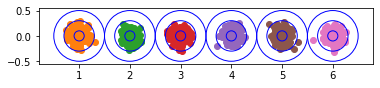

In [7]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import random
%matplotlib inline

# Figureオブジェクトとそれに属する一つのAxesオブジェクトを同時に生成
fig, ax = plt.subplots()
color_mat = plt.get_cmap("tab10") #カラーマップtab10を変数に代入する。

for key, data_value in darts_data.items():
    # 円を定義し、描画する
    outer_circle = patches.Circle(xy=(key, 0), radius=0.5, ec='b', fill=False)
    inner_circle = patches.Circle(xy=(key, 0), radius=0.3, ec='b', fill=False)
    senter_circle = patches.Circle(xy=(key, 0), radius=0.1, ec='b', fill=False)
    ax.add_patch(outer_circle)
    ax.add_patch(inner_circle)
    ax.add_patch(senter_circle)
        
    for darts in data_value:
        ax.scatter(darts[0], darts[1],color = color_mat(key))

plt.axis('scaled')
ax.set_aspect('equal')

## 【問題5】関数化
ダーツを投げる回数、ダーツのまとの数が変わっても描画できるように、問題1~問題4で作成したコードを関数化しましょう。

《ヒント》  
ダーツの投げる回数とダーツのまとの数を関数の引数にしましょう。

### 5.1.1(解答)

In [22]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import random
%matplotlib inline
np.set_printoptions(precision=2)

def darts_data(mato, num):
    darts_dict= {}
    for i in range(num):
        dice = list(range(1, mato+1)) #的数の設定リスト
        target = np.random.choice(dice) #指定したリストからランダムに値を出す関数
        x_bar = np.random.normal(loc=target, scale=0.1, size=1) #正規分布をランダム生成する関数
        y_bar = np.random.normal(loc=0.0, scale=0.1, size=1)
        point = [target, [[x_bar], [y_bar]]]
        darts_dict.setdefault(point[0],[]).append(point[1])
        
    fig, ax = plt.subplots()
    color_mat = plt.get_cmap("tab10") #カラーマップtab10を変数に代入する。

    for key, data_value in darts_dict.items():
    # 円を定義し、描画する
        outer_circle = patches.Circle(xy=(key, 0), radius=0.5, ec='b', fill=False)
        inner_circle = patches.Circle(xy=(key, 0), radius=0.3, ec='b', fill=False)
        senter_circle = patches.Circle(xy=(key, 0), radius=0.1, ec='b', fill=False)
        ax.add_patch(outer_circle)
        ax.add_patch(inner_circle)
        ax.add_patch(senter_circle)
        
        for darts in data_value:
            ax.scatter(darts[0], darts[1],color = color_mat(key))

    plt.axis('scaled')
    return ax.set_aspect('equal')

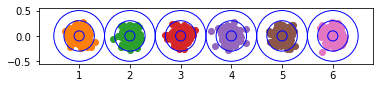

In [23]:
darts_data(6,1000)